# NN using tensor flow

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [17]:
batch_size = 10
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './images',  # This is the source directory for training images
    target_size=(100, 100),  # All images will be resized to 200 x 200
    batch_size=batch_size,
    class_mode='binary',
    seed=1
    )

Found 1750 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(32, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [20]:
n_epochs = 5
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(len(train_generator.filepaths)/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/5
35/35 [==============================] - 17s 491ms/step - loss: 0.6653 - acc: 0.6526
Epoch 2/5
35/35 [==============================] - 14s 393ms/step - loss: 0.4706 - acc: 0.7726
Epoch 3/5
35/35 [==============================] - 14s 397ms/step - loss: 0.3922 - acc: 0.8400
Epoch 4/5
35/35 [==============================] - 14s 400ms/step - loss: 0.3477 - acc: 0.8611
Epoch 5/5
35/35 [==============================] - 14s 400ms/step - loss: 0.3233 - acc: 0.8697


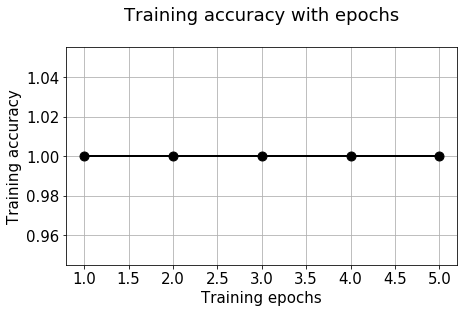

In [10]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

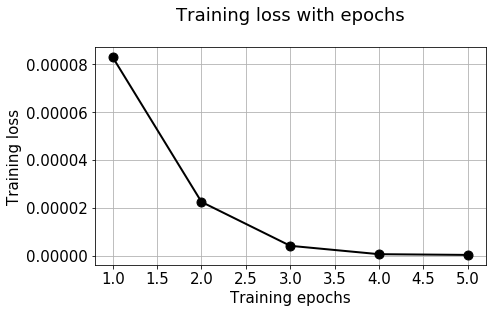

In [11]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()